In [4]:
import ipynb.fs.defs.functions_new as fct
import pandas as pd
import numpy as np
import pickle

In [25]:
all_users_folder = 'data/all_users/'
model_name = 'model2_v0_alpha_beta_pi_t_newB3'

## Model comparison

In [26]:
nLLs_concat = pd.read_pickle(all_users_folder+'fit/nLLs_concat.pkl')
bic_aic_means = nLLs_concat.groupby('model').mean()
table_bic_aic = bic_aic_means.style.highlight_min(color = 'lightblue', subset = ['nLL', 'BIC', 'AIC'], axis = 0)
table_bic_aic.format({'Ntrials': "{:.0f}", 'Nparams': "{:.0f}"})
table_bic_aic

,Ntrials,nLL,Nparams,BIC,AIC
model,,,,,
model0_alpha,112,57.466712,1,119.651922,116.933423
model0_alpha_beta,112,53.945611,2,117.328220,111.891222
model0_beta,112,55.667431,1,116.053361,113.334862
model0_v0,112,57.486428,1,119.691354,116.972856
model0_v0_alpha,112,52.868854,2,115.174706,109.737708
model0_v0_alpha_beta,112,48.778308,3,111.712113,103.556616
model0_v0_beta,112,51.026979,2,111.490955,106.053957
model1_alpha_beta_pi,112,48.476821,3,111.109139,102.953642
model1_alpha_pi,112,51.276560,2,111.990117,106.553119


## Parameter recovery

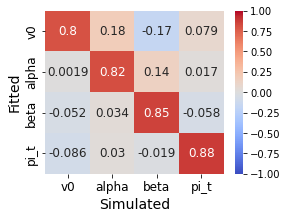

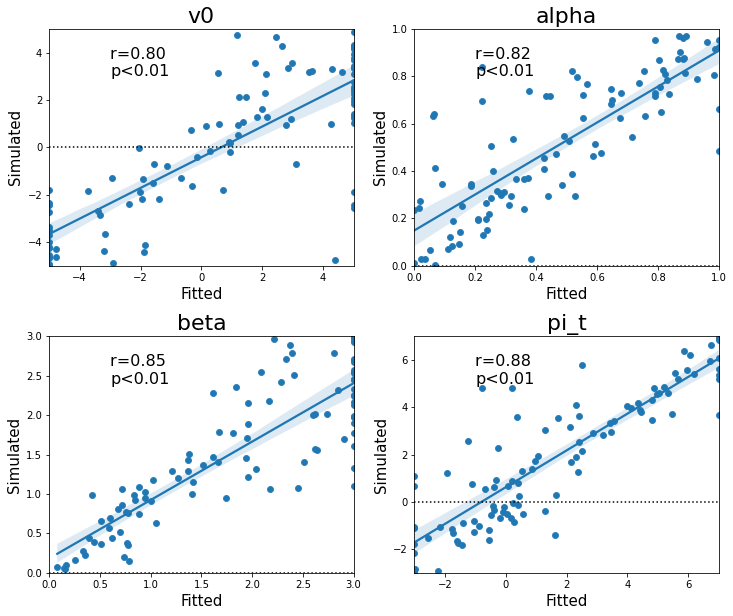

In [27]:
df = pd.read_pickle(all_users_folder + 'sim_refit/' + model_name + '.pkl')
fct.plot_param_recov_conf_matrix(df)
fct.plot_param_recov_correlations(df)

## Model fitting

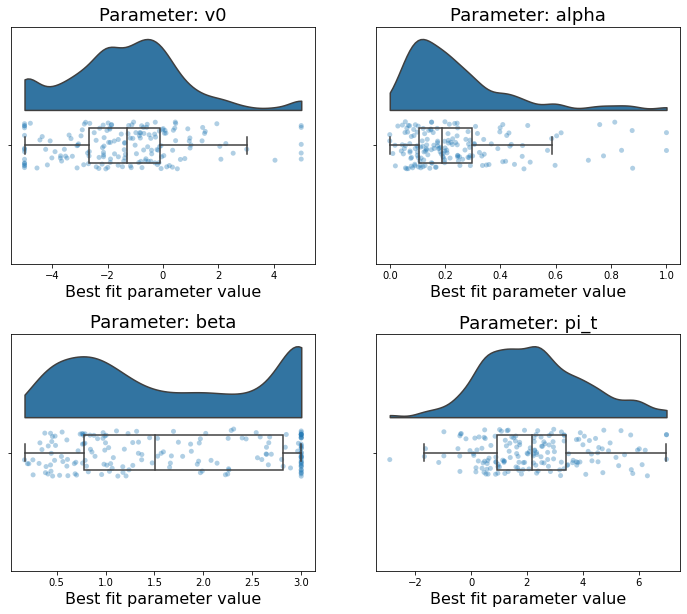

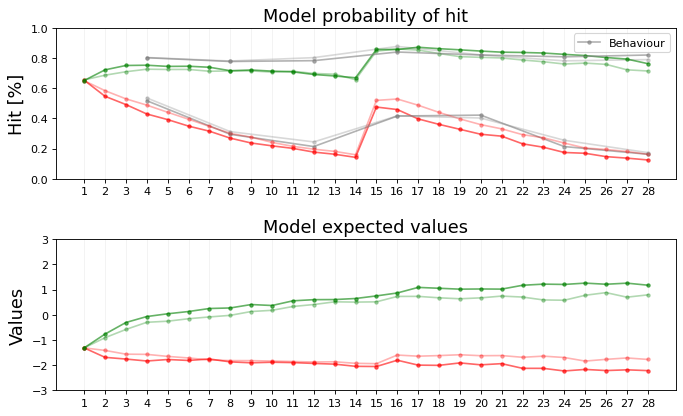

In [28]:
# Plot model parameters
model_folder = all_users_folder + 'fit/' + model_name
data_mod = pd.read_pickle(model_folder + '/mod_param_fits.pkl')
mod_info = pd.read_pickle(model_folder + '/mod_parameters.pkl')
fct.plot_model_parameters(data_mod, mod_info['param_names'])

data_mod_num = data_mod.apply(pd.to_numeric)
data_mod_num.drop('ID', axis=1).describe()

# Plot model predictions and behaviour
ev_per_trial = pd.read_pickle(model_folder + '/mod_ev_per_trial.pkl');
p_hit_per_trial = pd.read_pickle(model_folder + '/mod_p_hit_per_trial.pkl');
fct.fig_modelpred_on_behav(ev_per_trial, p_hit_per_trial, all_users_folder)

## Save

In [29]:
ev_per_trial

,Cue,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,LP,-2.145972,-2.145972,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038,...,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038,-2.442038
1,HR,-2.145972,-1.404674,-1.155222,-1.554066,-1.496589,-1.496589,-1.496589,-1.496589,-1.86002,...,-1.148386,-1.148386,-0.510575,0.061072,0.061072,0.061072,-0.463945,-0.463945,0.102865,-0.011542
2,HP,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,...,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972,-2.145972
3,LR,-2.145972,-1.404674,-1.155222,-0.931647,-0.931647,-1.353683,-1.353683,-1.353683,-0.694575,...,-0.849135,-0.864786,-0.864786,-0.256394,0.288885,0.288885,0.362654,0.362654,0.362654,0.362654
4,HR,-1.235051,-0.792519,-1.625585,-2.293708,-2.293708,-2.293708,-2.293708,-2.293708,-2.293708,...,-0.057531,-1.036122,0.159009,1.117508,0.698249,-0.429984,0.645134,1.507382,1.406922,2.118339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,HR,-2.196805,-1.130668,-1.703872,-1.703872,-0.710759,-0.753607,-0.493827,-1.161373,-1.161373,...,-0.302764,0.482789,1.15197,0.833177,1.450451,1.087441,1.667048,2.160793,1.988833,0.953505
676,LP,-3.703413,-4.261793,-4.261793,-4.261793,-4.261793,-4.261793,-4.261793,-4.261793,-4.261793,...,-1.424252,-2.964162,-2.964162,-1.25698,-1.146311,-2.805917,-2.028192,-0.724089,-2.565527,-2.565527
677,HP,-3.703413,-4.261793,-4.261793,-4.261793,-4.261793,-4.261793,-4.261793,-4.261793,-4.261793,...,-4.579705,-4.579705,-4.579705,-4.579705,-4.579705,-4.579705,-4.579705,-4.579705,-4.579705,-4.579705
678,LR,-3.703413,-2.539177,-2.539177,-2.539177,-2.539177,-2.539177,-2.539177,-2.539177,-2.539177,...,2.167275,1.664583,0.51707,0.725046,-1.740468,-0.560275,-0.560275,-0.749644,-2.580077,0.684313


In [30]:
p_hit_per_trial

,Cue,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,LP,0.156277,0.146691,0.094292,0.082298,0.079524,0.076836,0.066898,0.060242,0.047049,...,0.085159,0.058164,0.04875,0.047049,0.045405,0.043815,0.037972,0.027441,0.026462,0.022059
1,HR,0.205794,0.425545,0.485472,0.311009,0.23322,0.226616,0.213807,0.207604,0.120906,...,0.405372,0.387523,0.605974,0.784052,0.77767,0.690938,0.47669,0.421377,0.586084,0.532731
2,HP,0.211957,0.193867,0.182473,0.176974,0.171606,0.137596,0.113124,0.105853,0.083559,...,0.113124,0.095718,0.086461,0.083559,0.05704,0.055067,0.053158,0.051311,0.047799,0.046129
3,LR,0.199764,0.380704,0.42086,0.498502,0.452022,0.220188,0.207646,0.201576,0.370626,...,0.540086,0.478097,0.431881,0.629611,0.793839,0.754805,0.704131,0.663858,0.655484,0.638447
4,HR,0.944791,0.971753,0.713624,0.228433,0.151788,0.136283,0.109268,0.087068,0.07757,...,0.990149,0.73985,0.985978,0.999091,0.996385,0.832709,0.988487,0.998138,0.996767,0.998265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,HR,0.622608,0.921711,0.570464,0.380596,0.911989,0.851595,0.901872,0.364657,0.143265,...,0.997198,0.999217,0.999509,0.997636,0.99941,0.994864,0.998767,0.999618,0.998618,0.94586
676,LP,0.42054,0.285658,0.250435,0.20818,0.198477,0.189118,0.171424,0.163082,0.10205,...,0.700401,0.283168,0.25949,0.615532,0.583521,0.183056,0.237136,0.416844,0.097658,0.087596
677,HP,0.391651,0.261848,0.228621,0.218228,0.14001,0.069524,0.049573,0.03513,0.027853,...,0.096194,0.081662,0.058446,0.055235,0.052191,0.043983,0.034938,0.02936,0.023249,0.020678
678,LR,0.27298,0.489626,0.38678,0.305696,0.29313,0.268932,0.257318,0.246036,0.194754,...,0.993795,0.981917,0.930426,0.862283,0.329051,0.485342,0.440687,0.368186,0.081869,0.658588
